In [1]:
import pandas as pd 
import numpy as np

In [2]:
url = r'C:\Users\joth1\Documents\github\NaiveBayes-ML-MiniCodigo\census_regras.csv'
df = pd.read_csv(url)

### Base está toda Preenchida

In [3]:
df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
c#income          0
dtype: int64

In [4]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
display(df)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,c#income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
import seaborn as sns
display(np.unique(df['c#income'], return_counts=True))

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<Axes: xlabel='c#income', ylabel='Count'>

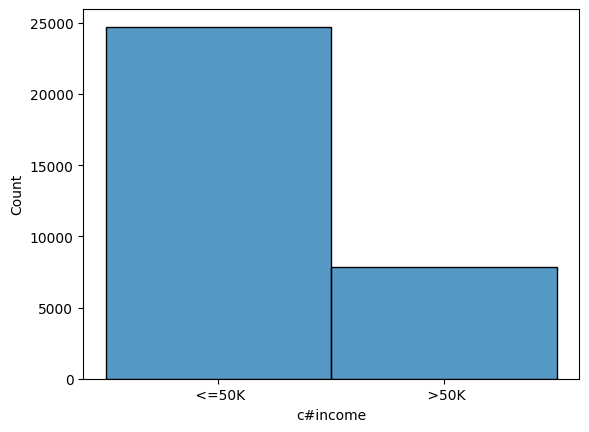

In [7]:
sns.histplot( x = df['c#income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

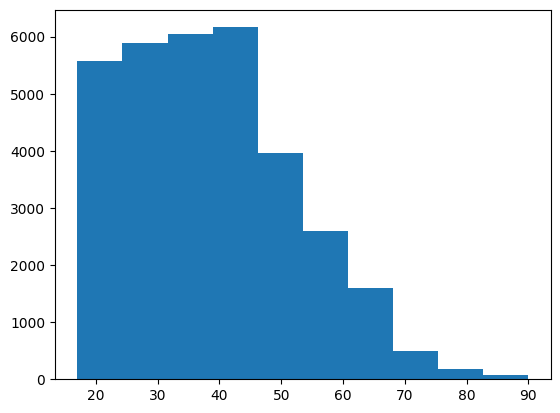

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['age'])

### Dividindo Previsores e Classe

In [13]:
X_census = df.iloc[:, 0:13].values
X_census

array([[39, ' State-gov', 77516, ..., 2174, 0, 40],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 0, 13],
       [38, ' Private', 215646, ..., 0, 0, 40],
       ...,
       [58, ' Private', 151910, ..., 0, 0, 40],
       [22, ' Private', 201490, ..., 0, 0, 20],
       [52, ' Self-emp-inc', 287927, ..., 15024, 0, 40]], dtype=object)

### Ordeno dos menores para os maiores para o algoritmo entender que cada um tem um peso diferente 


In [14]:
import numpy as np
np.unique(df['education'])

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [15]:
y = df.iloc[:,14]
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: c#income, Length: 32561, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
encoder = LabelEncoder()

X_census[:,1] = encoder.fit_transform(X_census[:,1])
X_census[:,3] = encoder.fit_transform(X_census[:,3])
X_census[:,5] = encoder.fit_transform(X_census[:,5])
X_census[:,6] = encoder.fit_transform(X_census[:,6])
X_census[:,7] = encoder.fit_transform(X_census[:,7])
X_census[:,8] = encoder.fit_transform(X_census[:,8])
X_census[:,9] = encoder.fit_transform(X_census[:,9])

In [18]:
X_census

array([[39, 7, 77516, ..., 2174, 0, 40],
       [50, 6, 83311, ..., 0, 0, 13],
       [38, 4, 215646, ..., 0, 0, 40],
       ...,
       [58, 4, 151910, ..., 0, 0, 40],
       [22, 4, 201490, ..., 0, 0, 20],
       [52, 5, 287927, ..., 15024, 0, 40]], dtype=object)